# Overview of available variables and analysis results

Data analysis is supposed to be done in script `EVAL_SCRIPT.py` which can be found in the parent directory. This script is supposed to create output files and plots that may be used here to summarise the results.

In [1]:
import os
import pyaerocom as pya
pya.change_verbosity('critical')

import EVAL_POST as helpers

2018-08-14 13:55:41,340:INFO:
Reading aliases ini file: /home/jonasg/github/pyaerocom/pyaerocom/data/aliases.ini


Check for updates in file containing models.

In [2]:
model_info_file = '/lustre/storeA/project/aerocom/aerocom-users-database/AEROCOM-PHASE-III/reference-list'

if os.path.exists(model_info_file):
    with open(model_info_file) as f:
        for line in f:
            if line.strip():
                print(line)
pya.const.AERONET_INV_V2L2_DAILY_NAME

1 NorESM: AlfKirkevag MetNo

  CAM6-Oslo_NF2kNucl_7jun2018AK

attention

is on /lustre/storeA/project/aerocom/aerocom2/NorESM_SVN_TEST

2 OsloCTM3 : Gunnar Myhre - Marianne Lund CICERO

OsloCTM2_INSITU  (includes extinction and absorption coefficients)

is probably outdated...

3 TM5-AP3: Twan van Noye KNMI

TM5_AP3-CTRL2016

and

TM5_AP3-INSITU (daily files are missing, but Jan should produce them)



'AeronetInvV2Lev2.daily'

### Define models, obsnetworks, years, and variables

In [3]:
YEARS = [2010, 2008, 9999]

# List of models considered
MODEL_LIST = ['CAM6-Oslo_NF2kNucl_7jun2018AK',
              'OsloCTM2_INSITU',
              'TM5_AP3-CTRL2016',
              'TM5_AP3-INSITU']

# List of ungridded obsnetworks considered (so far)
UNGRIDDED_OBS_NETWORKS = {'AeronetSunV2Lev2.daily' : 'od550aer',
                          'AeronetSunV3Lev2.daily' : 'od550aer',
                          'AeronetSDAV2Lev2.daily' : ['od550lt1aer', 
                                                      'od550gt1aer'],
                          'AeronetSDAV3Lev2.daily' : ['od550lt1aer', 
                                                      'od550gt1aer'],
                          'AeronetInvV2Lev2.daily' : 'abs550aer',
                          'AeronetInvV3Lev2.daily' : 'abs550aer'
                          }

# Get unique variables
VARS = []
for k, v in UNGRIDDED_OBS_NETWORKS.items():
    if isinstance(v, str):
        VARS.append(v)
    else:
        VARS.extend(v)
VARS = list(dict.fromkeys(VARS))

### Import model results

In [4]:
read_models = pya.io.ReadGriddedMulti(MODEL_LIST)
read_models.read_individual_years(VARS, YEARS)

OrderedDict([('CAM6-Oslo_NF2kNucl_7jun2018AK',
              <pyaerocom.io.readgridded.ReadGridded at 0x7fc633ac6390>),
             ('OsloCTM2_INSITU',
              <pyaerocom.io.readgridded.ReadGridded at 0x7fc633ac66a0>),
             ('TM5_AP3-CTRL2016',
              <pyaerocom.io.readgridded.ReadGridded at 0x7fc633ac6c18>),
             ('TM5_AP3-INSITU',
              <pyaerocom.io.readgridded.ReadGridded at 0x7fc633af7dd8>)])

Print overview of what is in the models

In [5]:
print(read_models)


Pyaerocom ReadGriddedMulti
--------------------------
Model IDs: ['CAM6-Oslo_NF2kNucl_7jun2018AK', 'OsloCTM2_INSITU', 'TM5_AP3-CTRL2016', 'TM5_AP3-INSITU']

Loaded data:

Pyaerocom ReadGridded
---------------------
Model ID: CAM6-Oslo_NF2kNucl_7jun2018AK
Data directory: /lustre/storeA/project/aerocom/aerocom2/NorESM_SVN_TEST/CAM6-Oslo_NF2kNucl_7jun2018AK/renamed
Available variables: ['abs440aer', 'abs500aer', 'abs5503Daer', 'abs550aer', 'abs550aercs', 'abs550bc', 'abs550dryaer', 'abs550dust', 'abs550oa', 'abs550so4', 'abs550ss', 'abs670aer', 'abs870aer', 'airmass', 'area', 'asy3Daer', 'bc5503Daer', 'cheaqpso4', 'chegpso4', 'chepso2', 'cl3D', 'clt', 'drybc', 'drydms', 'drydust', 'dryoa', 'dryso2', 'dryso4', 'dryss', 'ec5503Daer', 'ec550dryaer', 'emibc', 'emidms', 'emidust', 'emioa', 'emiso2', 'emiso4', 'emiss', 'hus', 'landf', 'loadbc', 'loaddms', 'loaddust', 'loadoa', 'loadso2', 'loadso4', 'loadss', 'mmraerh2o', 'mmrbc', 'mmrdu', 'mmroa', 'mmrso4', 'mmrss', 'od440aer', 'od440csaer', '

## Results

This section contains results from the analysis that can be performed using the script ``EVAL_SCRIPT.py``. The following lines read all result CSV files that are stored in the result folder, imports them and extracts **Bias (nmb), RMS and Pearson R coefficient)** as one multiindex dataframe.

In [6]:
results = helpers.load_result_files()
results = helpers.calc_stats(results)
    
table = helpers.to_multiindex_dataframe(results)

Reading result file od550lt1aer_TM5_AP3-CTRL2016_AeronetSDAV3Lev2.daily_2008_monthly_WORLD.csv
Reading result file od550aer_TM5_AP3-CTRL2016_AeronetSunV3Lev2.daily_2010_monthly_WORLD.csv
Reading result file abs550aer_TM5_AP3-CTRL2016_AeronetInvV3Lev2.daily_2008_monthly_WORLD.csv
Reading result file od550aer_OsloCTM2_INSITU_AeronetSunV2Lev2.daily_2008_monthly_WORLD.csv
Reading result file od550aer_OsloCTM2_INSITU_AeronetSunV3Lev2.daily_2008_monthly_WORLD.csv
Reading result file abs550aer_TM5_AP3-INSITU_AeronetInvV3Lev2.daily_2010_monthly_WORLD.csv
Reading result file od550aer_TM5_AP3-INSITU_AeronetSunV3Lev2.daily_2010_monthly_WORLD.csv
Reading result file od550lt1aer_TM5_AP3-CTRL2016_AeronetSDAV2Lev2.daily_2008_monthly_WORLD.csv
Reading result file abs550aer_TM5_AP3-CTRL2016_AeronetInvV2Lev2.daily_2010_monthly_WORLD.csv
Reading result file abs550aer_TM5_AP3-INSITU_AeronetInvV2Lev2.daily_2010_monthly_WORLD.csv
Reading result file od550lt1aer_TM5_AP3-CTRL2016_AeronetSDAV2Lev2.daily_2010_m

In [7]:
table.sort_index(inplace=True)
table

Bias  \
Model            Year Variable    Obs                                  
OsloCTM2_INSITU  2008 od550aer    AeronetSunV2Lev2.daily  -48.096741   
                                  AeronetSunV3Lev2.daily  -54.993631   
TM5_AP3-CTRL2016 2008 abs550aer   AeronetInvV2Lev2.daily  -48.434794   
                                  AeronetInvV3Lev2.daily  -39.669155   
                      od550aer    AeronetSunV2Lev2.daily    2.847311   
                                  AeronetSunV3Lev2.daily   -8.717583   
                      od550lt1aer AeronetSDAV2Lev2.daily -100.000000   
                                  AeronetSDAV3Lev2.daily -100.000000   
                 2010 abs550aer   AeronetInvV2Lev2.daily  -47.093272   
                                  AeronetInvV3Lev2.daily  -37.781593   
                      od550aer    AeronetSunV2Lev2.daily    3.887904   
                                  AeronetSunV3Lev2.daily   -4.165051   
                      od550lt1aer AeronetSDAV2Lev2.daily -100.000000   
                                  AeronetSDAV3Lev2.daily -100.000000   
TM5_AP3-INSITU   2010 abs550aer   AeronetInvV2Lev2.daily  -51.864067   
                                  AeronetInvV3Lev2.daily  -43.413967   
                      od550aer    AeronetSunV2Lev2.daily   -0.106881   
                                  AeronetSunV3Lev2.daily   -8.173309   
                      od550lt1aer AeronetSDAV2Lev2.daily   14.695330   
                                  AeronetSDAV3Lev2.daily    5.313304   

                                                               RMS         R  
Model            Year Variable    Obs                                         
OsloCTM2_INSITU  2008 od550aer    AeronetSunV2Lev2.daily  0.174878  0.630010  
                                  AeronetSunV3Lev2.daily  0.221493  0.585083  
TM5_AP3-CTRL2016 2008 abs550aer   AeronetInvV2Lev2.daily  0.026552  0.536176  
                                  AeronetInvV3Lev2.daily  0.022323  0.552968  
                      od550aer    AeronetSunV2Lev2.daily  0.119424  0.792646  
                                  AeronetSunV3Lev2.daily  0.147267  0.769819  
                      od550lt1aer AeronetSDAV2Lev2.daily  0.188389       NaN  
                                  AeronetSDAV3Lev2.daily  0.229937       NaN  
                 2010 abs550aer   AeronetInvV2Lev2.daily  0.027098  0.507868  
                                  AeronetInvV3Lev2.daily  0.021601  0.578689  
                      od550aer    AeronetSunV2Lev2.daily  0.124163  0.770182  
                                  AeronetSunV3Lev2.daily  0.180897  0.608492  
                      od550lt1aer AeronetSDAV2Lev2.daily  0.184397       NaN  
                                  AeronetSDAV3Lev2.daily  0.199415       NaN  
TM5_AP3-INSITU   2010 abs550aer   AeronetInvV2Lev2.daily  0.029607  0.435821  
                                  AeronetInvV3Lev2.daily  0.024702  0.485296  
                      od550aer    AeronetSunV2Lev2.daily  0.127039  0.750653  
                                  AeronetSunV3Lev2.daily  0.184020  0.592350  
                      od550lt1aer AeronetSDAV2Lev2.daily  0.093908  0.760871  
                                  AeronetSDAV3Lev2.daily  0.102457  0.755768

Text(0.5,1,'Model Bias [%]')

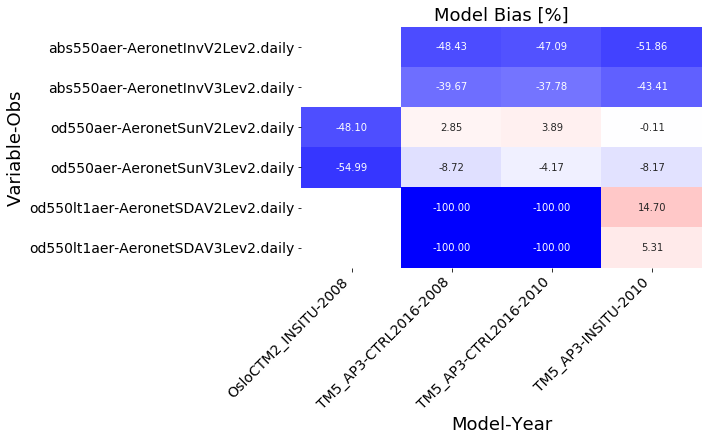

In [16]:
bias = table['Bias'].unstack(['Model', 'Year'])
ax = pya.plot.heatmaps.df_to_heatmap(bias, 
                                     color_rowwise=False,
                                     figsize=(10, 6))
ax.set_title('Model Bias [%]')

Text(0.5,1,'RMS')

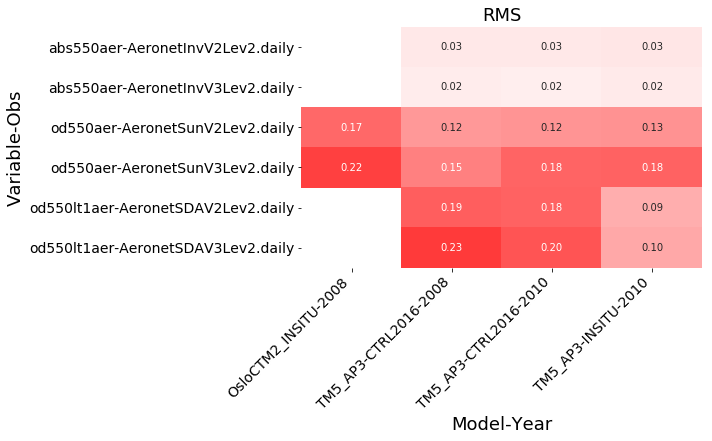

In [17]:
bias = table['RMS'].unstack(['Model', 'Year'])
ax = pya.plot.heatmaps.df_to_heatmap(bias, color_rowwise=False,
                                     figsize=(10, 6))
ax.set_title('RMS')

Text(0.5,1,'Pearson correlation')

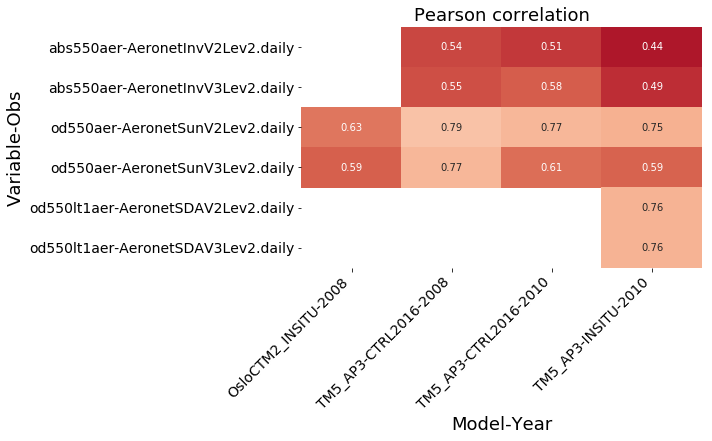

In [23]:
corr = table['R'].unstack(['Model', 'Year'])

ax = pya.plot.heatmaps.df_to_heatmap(corr, cmap='RdGy', color_rowwise=False,
                                     center=1, figsize=(10, 6))
ax.set_title('Pearson correlation')